Connected to sep28k (Python 3.11.0)

 # Gradient Descent for Linear Regression
 You can find the definitions for linear regression and the training data here.

 ## Training data
 | x   |  y  |
 |:----|:---:|
 | 1   |  1  |
 | 2   |  3  |
 | 4   |  3  |

 ### Feature extractor
 $\phi(x) = [1, x]$

 ### Weights
 $\mathbf{w} = [w_1, w_2]$

 ### Score
 $  f_{\mathbf{w}}(x) = \mathbf{w} \cdot \phi(x) $

 ### Squared Loss
 $ \text{Loss}(x, y, \mathbf{w}) = (f_{\mathbf{w}}(x) - y)^2 $

 ### Gradient of the Squared Loss
 $ \nabla_{\mathbf{w}} \text{TrainLoss}(\mathbf{w}) = \frac{1}{|\mathcal{D}_{\text{train}}|} \sum_{(x,y) \in \mathcal{D}_{train}} \underbrace{2 (\underbrace{\textcolor{red}{\mathbf{w} \cdot \phi(x)} - \textcolor{green}{y}}_{\text{\textcolor{red}{prediction}} - \text{\textcolor{green}{target}}})}_{\text{derivative of outer function}} \cdot \underbrace{\phi(x)}_{\text{derivative of inner function}} $

 ### Gradient Descent
 ```
 Initialize w = [0, ..., 0]
 For t = 1, ..., T  (epochs)
   For (x,y) ∊ D[train]
     w ← w - η ･ ∇Loss(x, y, w)
 ```

 ## 1. Use the data provided below to implement a class called LinearRegression
 The class should have a method called `fit` that performs training using gradient descent.
 Also think of implementing your feature extraction $\phi$ as a method.
 You can implement everything in the first section without any python package outside of the standard library.
 but I would recommend using `numpy` for access to the `numpy.dot` method for easy access
 to dot product computation.

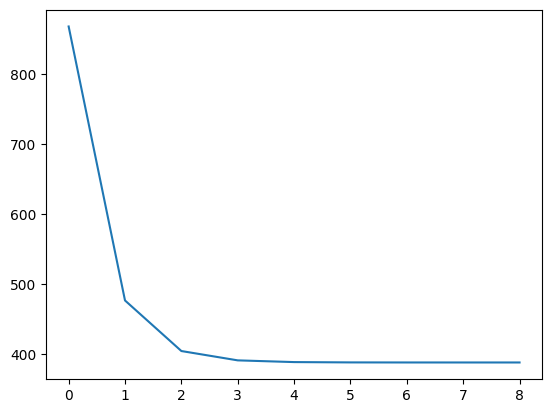

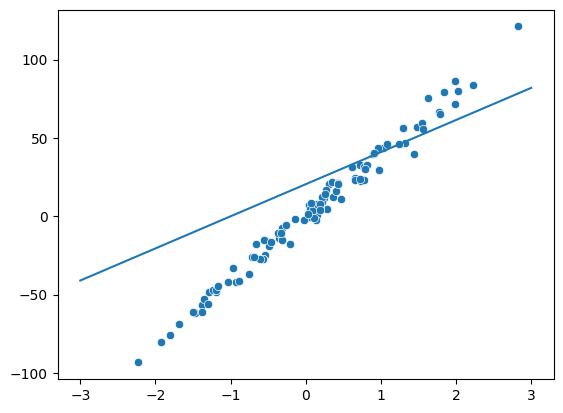

In [480]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn import datasets

class LinearRegression:
    def __init__(self) -> None:
        self.w = np.zeros((2,))
        self.loss_collector = {}

    def phi(self, x):
        return np.array([1, x])

    def score(self, x):
        return np.dot(self.w, self.phi(x))

    def linear_loss(self, y, y_hat):
        return y_hat - y

    def squared_loss(self, y, y_hat):
        return 0.5 * (y - y_hat)**2

    def grad_linear_loss(self, y, y_hat):
        return

    def grad_squared_loss(self, x, y, y_hat):
        return (np.dot(self.w, self.phi(x)) - y) * self.phi(x)

    def fit(self, data, epochs, lr=0.1):
        for epoch in range(epochs):
            grad_collector = []
            loss_collector = []
            for x, y in data:
                y_hat = self.score(x)
                loss = self.squared_loss(y, y_hat)
                loss_collector.append(loss)
                grad = self.grad_squared_loss(x, y, y_hat)
                grad_collector.append(grad)
            self.w -= lr * np.mean(grad_collector)
            self.loss_collector[epoch] = np.mean(loss_collector)



X, y = datasets.make_regression(100, 1, noise=5)

reg2 = LinearRegression()
reg2.fit(list(zip(X[:,0],y)), 9, lr=0.5)
sb.lineplot(reg2.loss_collector)
plt.show()

sb.scatterplot(x=X[:,0], y=y)
aaa = np.linspace(-3, 3, 100)
sb.lineplot(x=aaa, y=reg2.w[0]*aaa+reg2.w[1])
plt.show()

<Axes: >

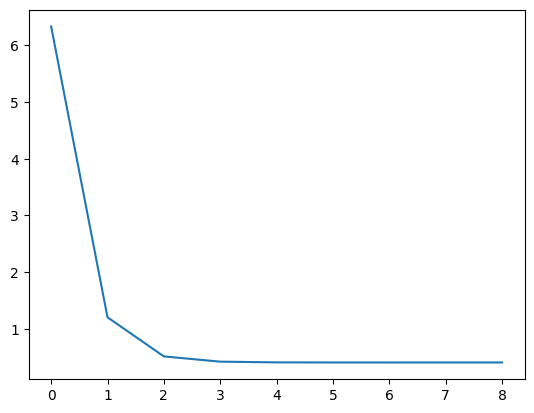

In [479]:
# TODO this should be working in the end
reg = LinearRegression()
data = np.array([[1, 1], [2, 3], [4, 3]])
reg.fit(data, 9, lr=0.1)

sb.lineplot(reg.loss_collector)

 ### 1.1 Implement Linear Loss
 Add a method to your class that computes the linear loss

 ### 1.2 Implement Squared Loss
 Add a method to your class that computes the squared loss
 ### 1.3 Implement the Gradient computation for both losses
 Implement the functionality to compute the gradient for both functions

 ### 1.4 Implement Gradient Descent that can use both loss functions
 Now implement the core of what we did in the lectures.
 Iterate over the number of epochs and inside this loop over the data.
 Keep track of the loss and the gradient for the examples. Once you
 computed it for the whole data, compute the gradient update as per the formulas
 and the algorithm from the lectures.

 ### 1.4 Run the optimization using both
 ### 1.5. Create the functionality to keep track of the loss during training
 Calculate the loss and store it in a dictionary or list that is part of your class.
 In a dictionary, the keys would be the epochs. In a list, you could just add an item for
 every epoch. The index location of the calculated loss + 1 would indicate the training epoch.

 ## 2. Plot the loss curves
 Install two libraries for plotting.
 Seaborn is a more intuitive and simpler interface to the matplotlib functionality.
 Sometimes you need to adapt things using matplotlib.
 ```bash
 pip install seaborn
 pip install matplotlib
 ```

 ### 2.1 Create a more realistic example using sklearn
 Use `sklearn.datasets.make_regression` to create a toy dataset.
 #### Installing scikit Learn
 ```bash
 pip install scikit-learn
 ```python
 from sklearn import datasets
 X, y = datasets.make_regression(100, 1,) # 100 samples, 1 feature, no noise
 ```
 Run your own regression model and check for runtimes and runtime differences
 Also keep track of the loss and plot it.
 Add a bit of noise to the create process of the data. Check the documentation
 of the function on how to do that.

 ### 2.2. Make a scatter plot of the data and plot the regression line
 Using the data you crated, please plot the data and add the regression line
 based on the weights $\mathbf{w}$ you learned from the data.
 Is it a good fit?